<a href="https://colab.research.google.com/github/kranthi0003/Major/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pwd

/content


In [4]:
cd /content/gdrive

/content/gdrive


In [5]:
!ls

MyDrive


In [6]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [9]:
!git clone https://github.com/nicknochnack/RealTimeObjectDetection

Cloning into 'RealTimeObjectDetection'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 27 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (27/27), done.


In [10]:
cd /content/gdrive/MyDrive/RealTimeObjectDetection

/content/gdrive/MyDrive/RealTimeObjectDetection


In [11]:
!ls

Tensorflow  Tutorial.ipynb


In [12]:
pwd

'/content/gdrive/MyDrive/RealTimeObjectDetection'

In [13]:
cd /content/gdrive/MyDrive/RealTimeObjectDetection/Tensorflow

/content/gdrive/MyDrive/RealTimeObjectDetection/Tensorflow


In [14]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 1836, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 1836 (delta 30), reused 49 (delta 17), pack-reused 1759
Receiving objects: 100% (1836/1836), 232.81 MiB | 25.72 MiB/s, done.
Resolving deltas: 100% (1077/1077), done.


In [16]:
#0.setup path

In [28]:
WORKSPACE_PATH = '/content/RealTimeObjectDetection/Tensorflow/workspace'
SCRIPTS_PATH = '/content/RealTimeObjectDetection/Tensorflow/scripts'
APIMODEL_PATH = '/content/RealTimeObjectDetection/Tensorflow/models'
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations/'
IMAGE_PATH = WORKSPACE_PATH+'/images/'
MODEL_PATH = WORKSPACE_PATH+'/models/'
PRETRAINED_MODEL_PATH = WORKSPACE_PATH+'/pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/my_ssd_mobnet/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/my_ssd_mobnet/'


In [18]:
#1. Create Label Map

In [20]:
"""item { 
	name:'Bear'
	id:1
}
item { 
	name:'Cloth'
	id:2
}
item { 
	name:'Surgical'
	id:3
}
item { 
	name:'N95'
	id:4
}"""


"item { \n\tname:'Bear'\n\tid:1\n}\nitem { \n\tname:'Cloth'\n\tid:2\n}\nitem { \n\tname:'Surgical'\n\tid:3\n}\nitem { \n\tname:'N95'\n\tid:4\n}"

In [11]:
cd /content/

/content


In [24]:
%mv /content/gdrive/MyDrive/RealTimeObjectDetection /content/

In [25]:
pwd

'/content'

In [26]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58094, done.
remote: Counting objects: 100% (511/511), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 58094 (delta 324), reused 443 (delta 275), pack-reused 57583
Receiving objects: 100% (58094/58094), 573.18 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (40272/40272), done.


In [13]:
cd /content/models/research

/content/models/research


In [14]:
!protoc object_detection/protos/*.proto --python_out=.

In [29]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [15]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [16]:
!make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-ind

In [33]:
cp -r pycocotools /content/models/research

In [35]:
#Install the Object Detection API

In [17]:
cd ..

/content/models/research/cocoapi


In [18]:
cd ..

/content/models/research


In [19]:
cp object_detection/packages/tf2/setup.py .

In [20]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 10.0MB/s 
     |████████████████████████████████| 358kB 36.1MB/s 
     |████████████████████████████████| 1.6MB 45.8MB/s 
     |████████████████████████████████| 829kB 40.6MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 2.3MB 42.4MB/s 
     |████████████████████████████████| 153kB 46.0MB/s 
     |████████████████████████████████| 686kB 39.4MB/s 
     |████████████████████████████████| 102kB 15.6MB/s 
     |████████████████████████████████| 645kB 38.8MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 38.2MB 72kB/s 
     |████████████████████████████████| 1.2MB 44.8MB/s 
     |████████████████████████████████| 215kB 55.5MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1657646 sha256=b79d7a4a34d4bd7cdae6b818

In [21]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

2021-06-30 10:03:17.121628: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-30 10:03:19.119782: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-30 10:03:19.125381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-30 10:03:19.125986: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-30 10:03:19.126021: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

In [43]:
cd /content/RealTimeObjectDetection/Tensorflow/workspace/pre-trained-models

/content/RealTimeObjectDetection/Tensorflow/workspace/pre-trained-models


In [44]:
!ls

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz


In [49]:
cd /content

/content


In [51]:
!ls

gdrive	models	RealTimeObjectDetection  sample_data


In [52]:
pwd

'/content'

In [55]:
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -x {IMAGE_PATH + '/train'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/train.record'}

Successfully created the TFRecord file: /content/RealTimeObjectDetection/Tensorflow/workspace/annotations/train.record


In [56]:
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -x{IMAGE_PATH + '/test'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/test.record'}


Successfully created the TFRecord file: /content/RealTimeObjectDetection/Tensorflow/workspace/annotations/test.record


In [57]:
#3. Copy Model Config to Training Folder

In [58]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'

In [61]:
!mkdir {'/content/RealTimeObjectDetection/Tensorflow/workspace/models/'+CUSTOM_MODEL_NAME}

In [63]:
!cp {PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'} {MODEL_PATH+'/'+CUSTOM_MODEL_NAME}

In [83]:
#4.Update Config For Transfer Learning

In [24]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format


In [77]:
cd /content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet/

/content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet


In [78]:
!ls

pipeline.config


In [80]:
config = config_util.get_configs_from_pipeline_file('pipeline.config')

In [81]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "/content/RealTimeObjectDetection/Tensorflow/workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/RealTimeObjectDetection/Tensorflow/workspace/annotations/test.record"
 },
 'eval_input_configs': [label_map_path: "/content/RealTimeObjectDetection/Tensorflow/workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/RealTimeObjectDetection/Tensorflow/workspace/annotations/test.record"
 }
 ],
 'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
     

In [84]:
#5. Train the model

In [85]:
print("""python {}/research/object_detection/model_main_tf2.py --model_dir={}/{} --pipeline_config_path={}/{}/pipeline.config --num_train_steps=5000""".format(APIMODEL_PATH, MODEL_PATH,CUSTOM_MODEL_NAME,MODEL_PATH,CUSTOM_MODEL_NAME))

python /content/RealTimeObjectDetection/Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=/content/RealTimeObjectDetection/Tensorflow/workspace/models//my_ssd_mobnet --pipeline_config_path=/content/RealTimeObjectDetection/Tensorflow/workspace/models//my_ssd_mobnet/pipeline.config --num_train_steps=5000


In [88]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=/content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=5000


2021-06-30 08:11:46.956919: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 08:11:48.865469: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-30 08:11:48.871664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-30 08:11:48.872226: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-30 08:11:48.872272: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 08:11:48.878107: I tensorflow/stream_executor/platform/default

In [66]:
cd /content/models/research/object_detection/

/content/models/research/object_detection


In [67]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir /content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet --output_directory /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model

2021-06-30 10:49:12.114367: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 10:49:13.750853: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-30 10:49:13.756290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-30 10:49:13.756927: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-30 10:49:13.756970: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-30 10:49:13.763409: I tensorflow/stream_executor/platform/default

Inferencing Trained Model

Loading model...Done! Took 11.809161186218262 seconds
Running inference for /content/RealTimeObjectDetection/Tensorflow/workspace/images/train/surgical15.jpg... Done


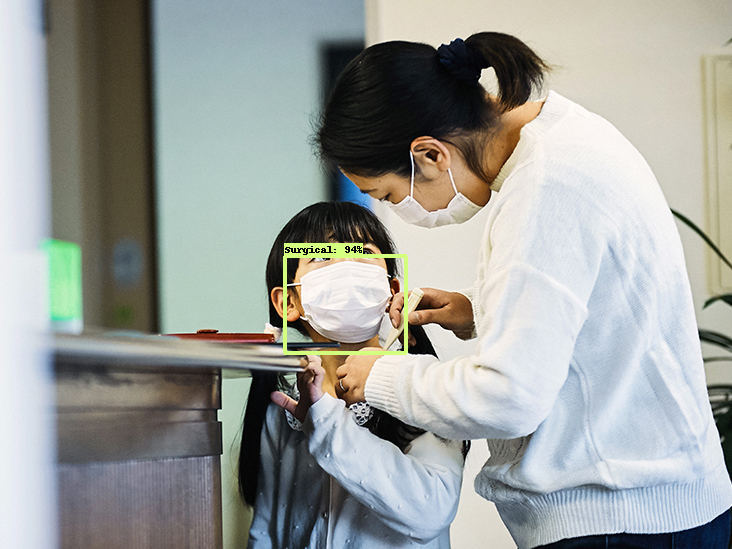

In [79]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')


# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/RealTimeObjectDetection/Tensorflow/workspace/images/train/surgical15.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/RealTimeObjectDetection/Tensorflow/workspace/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


In [8]:
#6. Load Train Model From Checkpoint

In [22]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [26]:
#Load pipeline config and build a detection model
CONFIG_PATH = '/content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config' 
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

In [29]:
# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-6')).expect_partial()

In [57]:
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

In [58]:
#7.Detect in Real-Time
import cv2 
import numpy as np

In [59]:
category_index = label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+'/label_map.pbtxt')

In [60]:
category_index

{1: {'id': 1, 'name': 'Bear'},
 2: {'id': 2, 'name': 'Cloth'},
 3: {'id': 3, 'name': 'Surgical'},
 4: {'id': 4, 'name': 'N95'}}

In [64]:
# Setup capture
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [63]:
while True:
    # Read frame from camera
    ret, image_np = cap.read()

    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'][0].numpy(),
          (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
          detections['detection_scores'][0].numpy(),
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=5,
          min_score_thresh=.5,
          agnostic_mode=False)

    # Display output
    cv2.imshow('object detection', cv2.resize(image_np_with_detections, (800, 600)))

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: ignored

In [81]:
!cp -r /content/RealTimeObjectDetection /content/gdrive/MyDrive